<h2> Figure for paper: Comparison of the manifold for optimized PVs with and without the scaling layer

Comparison on the DNS dataset for the 10th layer

In [1]:
import os

#add the root directory
os.chdir('../')

In [2]:
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy.io import loadmat
from tools import *
import matplotlib.pyplot as plt
from loader import *
import logging

from utils import *

from PCAfold import normalized_variance_derivative

logging.disable(logging.CRITICAL) #disable the logging

In [3]:
data_path = 'data-files/'
nbr_species = 21
nbr_rows = 1536
nbr_cols = 1024

layer = 10 #chose layer to inspect

In [4]:
files = [i for i in listdir(data_path) if isfile(join(data_path + i))]
print(f"Number of files: {len(files)}")

Number of files: 98


In [5]:
state_space_names = []
state_space_source_names = [] #to check it is the same order as the state space
Not_species = ["T","U","V","W","X","Z"]
state_space = np.zeros((1,nbr_species))
data_state_space = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_state_space_source = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_mf = np.zeros((nbr_rows*nbr_cols,1))
data_T = np.zeros((nbr_rows*nbr_cols,1))

counter_state_space = 0
counter_state_space_source = 0

for file in files:
    if file.endswith('.mat'):
        print(f"Busy with {file}")

        data = loadmat(data_path + file)

        filename = file.removesuffix('.mat')
        file_data = np.array(data[filename])
        

        #if name of the file is not starting with an uppercase
        if(not file[0] == "R" and file[0].isupper() and file[0] not in Not_species):
            state_space_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space[:,counter_state_space] = flattened_data

            counter_state_space+=1

        elif(file[0] == "R"):
            state_space_source_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space_source[:,counter_state_space_source] = flattened_data

            counter_state_space_source+=1

        elif(file[0] == "Z"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_mf[:,0] = flattened_data
            
            print()
            print("mass fraction data done")
            print()

        elif(file[0] == "T"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_T[:,0] = flattened_data
            
            print()
            print("Temperature data done")
            print()

print(state_space_names)
print(f"counters of state space and sources are {counter_state_space} and {counter_state_space_source}")

Busy with curvature_Condi_3D_slices.mat
Busy with H2NN_3D_slice.mat
Busy with H2O2_3D_slice.mat
Busy with H2O_3D_slice.mat
Busy with H2_3D_slice.mat
Busy with HNO_3D_slice.mat
Busy with HO2_3D_slice.mat
Busy with HONO2_3D_slice.mat
Busy with HONO_3D_slice.mat
Busy with H_3D_slice.mat
Busy with N2H3_3D_slice.mat
Busy with N2O_3D_slice.mat
Busy with N2_3D_slice.mat
Busy with NH2_3D_slice.mat
Busy with NH_3D_slice.mat
Busy with NNH_3D_slice.mat
Busy with NO2_3D_slice.mat
Busy with NO_3D_slice.mat
Busy with N_3D_slice.mat
Busy with O2_3D_slice.mat
Busy with OH_3D_slice.mat
Busy with O_3D_slice.mat
Busy with RH2NN_3D_slice.mat
Busy with RH2O2_3D_slice.mat
Busy with RH2O_3D_slice.mat
Busy with RH2_3D_slice.mat
Busy with RHNO_3D_slice.mat
Busy with RHO2_3D_slice.mat
Busy with RHONO2_3D_slice.mat
Busy with RHONO_3D_slice.mat
Busy with RH_3D_slice.mat
Busy with RN2H3_3D_slice.mat
Busy with RN2O_3D_slice.mat
Busy with RN2_3D_slice.mat
Busy with RNH2_3D_slice.mat
Busy with RNH_3D_slice.mat
Busy w

Optimized PV and optimized PV source

In [ ]:
filename_without = "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_19Feb2025-hour_18h31_Tr35aW_s3"
filename_metadata_without = filename_without + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader_without = loadData(filename_species_names, path_metadata, filename_metadata_without)
idx_species_removed_without = loader_without.metadata["idx species removed"]
model_without = loader_without.loadModel()
id_model_without = loader_without.metadata["Training_id"]
output_idx_without = loader_without.metadata["output species idx"]
idx_species_removed_without = loader_without.metadata["idx species removed"]
input_scaling_without = loader_without.metadata["input scaling"]
input_species_scaling_without = loader_without.metadata["input species scaling"]
input_species_bias_without = loader_without.metadata["input species bias"]
range_mf_without  = loader_without.metadata["range_mf"]

optimized_PV_without = model_without.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed_without, axis=1))).detach().numpy()
optimized_PV_source_without = model_without.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed_without, axis=1))).detach().numpy()

In [35]:
filename = "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s3"
filename_metadata = filename + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["idx species removed"]
model = loader.loadModel()
id_model = loader.metadata["Training_id"]
output_idx = loader.metadata["output species idx"]
idx_species_removed = loader.metadata["idx species removed"]
input_scaling = loader.metadata["input scaling"]
input_species_scaling = loader.metadata["input species scaling"]
input_species_bias = loader.metadata["input species bias"]
range_mf  = loader.metadata["range_mf"]

optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()

<h3> Visualize the difference in weights

In [30]:
#Without the scaling layer

filename_without = "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_19Feb2025-hour_18h31_Tr35aW_s9"
filename_metadata_without = filename_without + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader_without = loadData(filename_species_names, path_metadata, filename_metadata_without)
idx_species_removed_without = loader_without.metadata["idx species removed"]
model_without = loader_without.loadModel()
id_model_without_without = loader_without.metadata["Training_id"]
output_idx_without = loader_without.metadata["output species idx"]
idx_species_removed_without = loader_without.metadata["idx species removed"]
input_scaling_without = loader_without.metadata["input scaling"]
input_species_scaling_without = loader_without.metadata["input species scaling"]
input_species_bias_without = loader_without.metadata["input species bias"]
range_mf_without  = loader_without.metadata["range_mf"]

optimized_PV_without = model_without.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed_without, axis=1))).detach().numpy()
optimized_PV_source_without = model_without.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed_without, axis=1))).detach().numpy()


###############################################################################################################################################################################""
#With the scaling layer

filename = "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s3"
filename_metadata = filename + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["idx species removed"]
model = loader.loadModel()
id_model = loader.metadata["Training_id"]
output_idx = loader.metadata["output species idx"]
idx_species_removed = loader.metadata["idx species removed"]
input_scaling = loader.metadata["input scaling"]
input_species_scaling = loader.metadata["input species scaling"]
input_species_bias = loader.metadata["input species bias"]
range_mf  = loader.metadata["range_mf"]

optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()

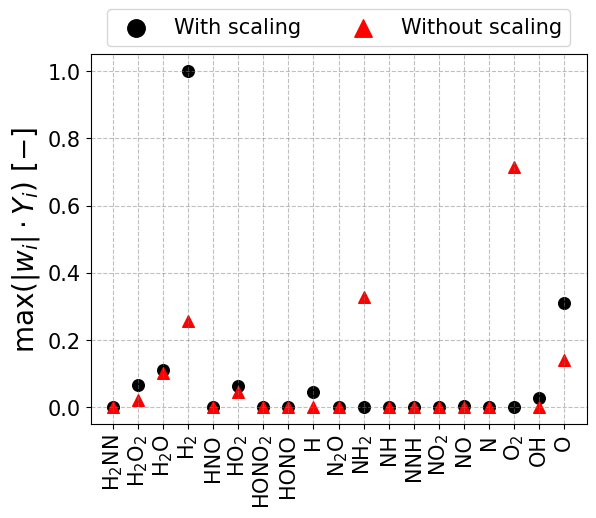

In [45]:
dataset = "low"

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/Weights/"
name = "weights max(wiYi) - without and with scaling layer - DNS.png"

abs = True

path_state = path_data + f"Xu-state-space-{dataset}.csv"

######################
#Without scaling layer
######################

final_weights_without = model_without.get_total_encoder_weights(npy = True)[0]

#get index spcies removed
my_species_without = Species(path_data)


list_species_without = my_species_without.get_list_species()
for index in sorted(idx_species_removed_without, reverse=True):
    list_species_without.pop(index)

#get mass fractions of species
state_space_without = read_csv(path_state, header = None)
state_space_without = state_space_without.drop(state_space.columns[idx_species_removed_without], axis=1)
state_space_matrix_without = state_space_without.to_numpy()

wi_Yi_without = state_space_matrix_without*np.abs(final_weights_without) #|w_i|*Y_i
if(abs):
    max_wi_Yi_without = np.max(wi_Yi_without, axis = 0) #take max of every species
else:
    max_wi_Yi_without = np.sign(final_weights_without)*np.max(wi_Yi_without, axis = 0) #take max of every species
max_wi_Yi_scaled_without = max_wi_Yi_without/np.max(np.abs(max_wi_Yi_without))



###################
#With scaling layer
###################

final_weights = model.get_total_encoder_weights(npy = True)[0]

#get index spcies removed
my_species = Species(path_data)

list_species = my_species.get_list_species()
for index in sorted(idx_species_removed, reverse=True):
    list_species.pop(index)

#get mass fractions of species
state_space = read_csv(path_state, header = None)
state_space = state_space.drop(state_space.columns[idx_species_removed], axis=1)
state_space_matrix = state_space.to_numpy()

wi_Yi = state_space_matrix*np.abs(final_weights) #|w_i|*Y_i
if(abs):
    max_wi_Yi = np.max(wi_Yi, axis = 0) #take max of every species
else:
    max_wi_Yi = np.sign(final_weights)*np.max(wi_Yi, axis = 0) #take max of every species
max_wi_Yi_scaled = max_wi_Yi/np.max(np.abs(max_wi_Yi))



#Use the same max
max_wi_Yi_all = max(np.max(np.abs(max_wi_Yi_without)), np.max(np.abs(max_wi_Yi)))
max_wi_Yi_scaled_without = max_wi_Yi_without/max_wi_Yi_all
max_wi_Yi_scaled = max_wi_Yi/max_wi_Yi_all

#################
#Plot the weights
#################

latex_species_list = [s.replace('2', r'$_2$') for s in list_species]
latex_species_list = [s.replace('3', r'$_3$') for s in latex_species_list]

plt.scatter(np.arange(len(max_wi_Yi_scaled)), max_wi_Yi_scaled, label = "With scaling", color = "k", s=70)
plt.scatter(np.arange(len(max_wi_Yi_scaled_without)), max_wi_Yi_scaled_without, color = "r", label = "Without scaling", marker = "^", s=70)
if(abs):
    plt.ylabel(r"max($|w_i| \cdot Y_i$) [$-$]",fontsize = 20)
else:
    plt.ylabel(r"max($w_i \cdot Y_i$) [$-$]",fontsize = 20)
plt.xticks(np.arange(len(max_wi_Yi_scaled)), latex_species_list,fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.legend(fontsize=15, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, scatterpoints=1, markerscale=1.5)

if(save):
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')
plt.show()

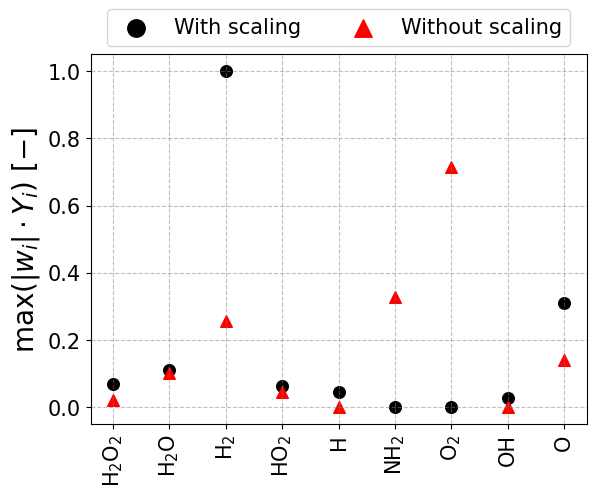

In [47]:
name = "weights max(wiYi) - without and with scaling layer - DNS - only important species.png"

valid_indices = [i for i in range(len(max_wi_Yi_scaled)) if np.abs(max_wi_Yi_scaled[i]) > 0.01 or np.abs(max_wi_Yi_scaled_without[i]) > 0.01]

# Filter data
filtered_max_wi_Yi_scaled = max_wi_Yi_scaled[valid_indices]
filtered_max_wi_Yi_scaled_without = max_wi_Yi_scaled_without[valid_indices]
filtered_species_list = [latex_species_list[i] for i in valid_indices]

# Plot filtered data
plt.scatter(np.arange(len(filtered_max_wi_Yi_scaled)), filtered_max_wi_Yi_scaled, label="With scaling", color="k", s=70)
plt.scatter(np.arange(len(filtered_max_wi_Yi_scaled_without)), filtered_max_wi_Yi_scaled_without, color="r", label="Without scaling", marker="^", s=70)

if abs:
    plt.ylabel(r"max($|w_i| \cdot Y_i$) [$-$]", fontsize=20)
else:
    plt.ylabel(r"max($w_i \cdot Y_i$) [$-$]", fontsize=20)

plt.xticks(np.arange(len(filtered_species_list)), filtered_species_list, fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.legend(fontsize=15, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, scatterpoints=1, markerscale=1.5)

if save:
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')

plt.show()

## Visualize manifolds with and without scaling layer

In [ ]:
filename_autoignition = "isochoric-adiabatic-closed-HR-H2-air-lin_Z_0.015_0.035_100-T0_900-"
path_data_autoignition = "data-files/autoignition/"
path_data = "data-files/"

#create all the datasets
mixture_fractions_train_0D = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fraction.csv") #1 x nbr_timesteps
mixture_fractions_test = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fractions-test-trajectories.csv") #1 x nbr_test_trajectories
state_space_names = np.genfromtxt(f"{path_data_autoignition}{filename_autoignition}state-space-names.csv", delimiter=",", dtype=str)
state_space_train_0D = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space.csv", names = state_space_names)
state_space_source_train_0D = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space-sources.csv", names = state_space_names)
time_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}time.csv") #1 x nbr_timesteps



filename_model = "Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h23_Tr0D-2q_s0"
filename_metadata = filename_model + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"]=="autoignition_augm" else loader.metadata["idx species removed"]
id_model_0D = loader.metadata["Training_id"]
model_0D = loader.loadModel()

weight_inversion = True
if(weight_inversion):
    with torch.no_grad():  # Ensures we do not track gradients for this operation
        model_0D.encoder_species.weight.mul_(-1)

state_space_names_DNS = np.genfromtxt(f"{path_data}Xu-state-space-names.csv", delimiter=",", dtype=str)

#create a np array in the format for the DNS dataset/optimized PV
state_space_train_DNS = state_space_train_0D[state_space_names_DNS].to_numpy()
state_space_source_train_DNS = state_space_source_train_0D[state_space_names_DNS].to_numpy()
print(state_space_source_train_DNS.shape)

PV_optimized_train_0D = model_0D.get_PV(torch.from_numpy(np.delete(state_space_train_DNS, idx_species_removed, axis=1))).detach().numpy()
PV_optimized_source_train_0D = model_0D.get_PV(torch.from_numpy(np.delete(state_space_source_train_DNS, idx_species_removed, axis=1))).detach().numpy()


filename_model_without = "Xu-AE-opt_adam-epo_100000-lr_0.025-date_22Mar2025-hour_23h09_Tr0D-2qW_s0"

filename_metadata_without = filename_model_without + "_metadata.pkl"
path_metadata_without = "metadata/"

loader_without = loadData(filename_species_names, path_metadata_without, filename_metadata_without)
idx_species_removed_without = loader_without.metadata["list idx species removed source"] if loader_without.metadata["dataset_type"]=="autoignition_augm" else loader_without.metadata["idx species removed"]
id_model_0D_without = loader_without.metadata["Training_id"]
model_0D_without = loader_without.loadModel()

weight_inversion = True
if(weight_inversion):
    with torch.no_grad():  # Ensures we do not track gradients for this operation
        model_0D_without.encoder_species.weight.mul_(-1)

state_space_names_DNS = np.genfromtxt(f"{path_data}Xu-state-space-names.csv", delimiter=",", dtype=str)

PV_optimized_train_0D_without = model_0D_without.get_PV(torch.from_numpy(np.delete(state_space_train_DNS, idx_species_removed_without, axis=1))).detach().numpy()
PV_optimized_source_train_0D_without = model_0D_without.get_PV(torch.from_numpy(np.delete(state_space_source_train_DNS, idx_species_removed_without, axis=1))).detach().numpy()

(241519, 21)


C:\Windows\Temp\ipykernel_9120\2856422905.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


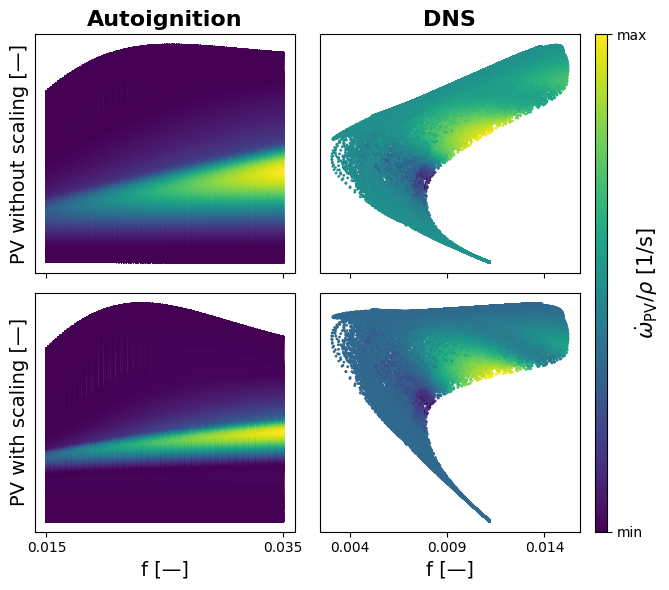

In [ ]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/"
name = f"f-PV optimized PV with and without scaling - 0D and DNS -  id {id_model, id_model_without, id_model_0D, id_model_0D_without}.png"

fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=False, sharey=False)

# === Top row: Without scaling layer ===
# 0D Autoignition
sc1 = axes[0, 0].scatter(mixture_fractions_train_0D, -PV_optimized_train_0D_without,
                         c=-PV_optimized_source_train_0D_without, s=1,
                         cmap='viridis')
axes[0, 0].set_title("Autoignition", fontsize=16, fontweight="bold")
axes[0, 0].set_ylabel("PV without scaling [—]", fontsize=14)
axes[0, 0].set_xticks([0.015, 0.035])
axes[0, 0].set_xticklabels([])
axes[0, 0].set_yticks([])
axes[0, 0].grid(False)

# DNS
sc2 = axes[0, 1].scatter(data_mf, -optimized_PV_without,
                         c=-optimized_PV_source_without, s=1,
                         cmap='viridis')
axes[0, 1].set_title("DNS", fontsize=16, fontweight="bold")
axes[0, 1].set_xticks([0.004, 0.009, 0.014])
axes[0, 1].set_xticklabels([])
axes[0, 1].set_yticks([])
axes[0, 1].grid(False)

# === Bottom row: With scaling layer ===
# 0D Autoignition
sc3 = axes[1, 0].scatter(mixture_fractions_train_0D, PV_optimized_train_0D,
                         c=PV_optimized_source_train_0D, s=1,
                         cmap='viridis')
axes[1, 0].set_ylabel("PV with scaling [—]", fontsize=14)
axes[1, 0].set_xlabel("f [—]", fontsize=14)
axes[1, 0].set_xticks([0.015, 0.035])
axes[1, 0].set_yticks([])
axes[1, 0].grid(False)

# DNS
sc4 = axes[1, 1].scatter(data_mf, optimized_PV,
                         c=optimized_PV_source, s=1,
                         cmap='viridis')
axes[1, 1].set_xlabel("f [—]", fontsize=14)
axes[1, 1].set_xticks([0.004, 0.009, 0.014])
axes[1, 1].set_yticks([])
axes[1, 1].grid(False)

cax = fig.add_axes([1, 0.105, 0.02, 0.83])

cbar = fig.colorbar(sc4, cax=cax, orientation='vertical')
cbar.set_label(r'$\dot{\omega}_{\mathrm{PV}} / \rho$ [1/s]', fontsize=15, labelpad=-10)

# Remove numeric ticks, replace with min/max text
vmin = optimized_PV_source.min()
vmax = optimized_PV_source.max()
cbar.set_ticks([vmin, vmax])
cbar.set_ticklabels([f"min", f"max"])

plt.tight_layout()
if(save):
    plt.savefig(pathSave + name, dpi=1000, bbox_inches = "tight")
plt.show()